In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering


In [2]:
file_path = '/Users/zeeshanabbasi/Desktop/internship projects/customer_segmentation/Mall_Customers.csv'
df = pd.read_csv(file_path)

print("First 5 rows of the dataset:")
print(df.head())

print("\nData Information:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nSummary statistics:")
print(df.describe())


First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Mi

Gender counts:
Gender
Female    112
Male       88
Name: count, dtype: int64


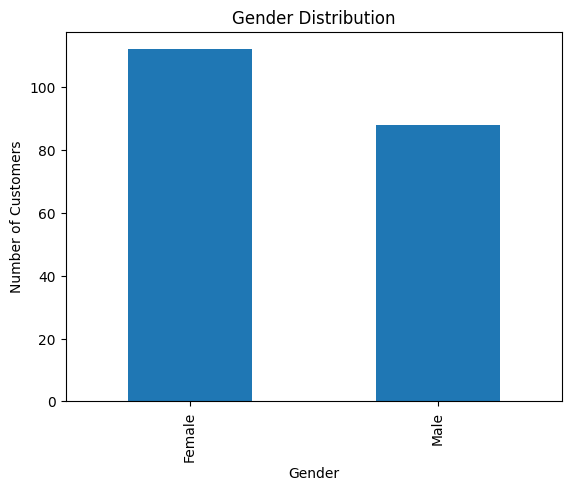

In [3]:
gender_counts = df['Gender'].value_counts()
print("Gender counts:")
print(gender_counts)

gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


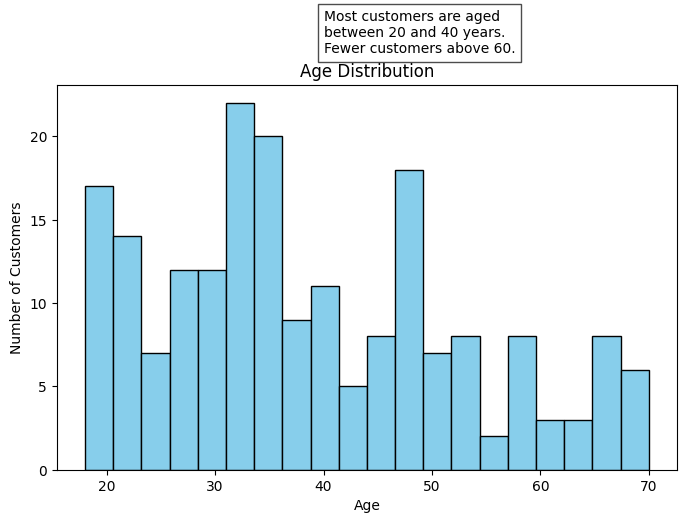

In [4]:
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.text(40, 25, "Most customers are aged\nbetween 20 and 40 years.\nFewer customers above 60.",
         bbox=dict(facecolor='white', alpha=0.7), fontsize=10)
plt.show()


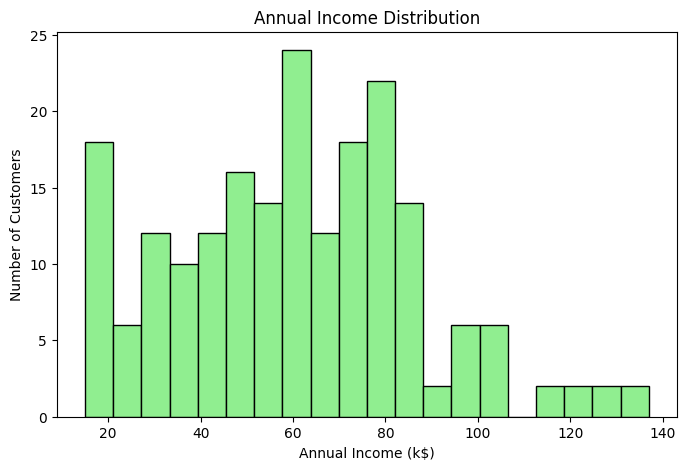

In [5]:
plt.figure(figsize=(8,5))
plt.hist(df['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.show()


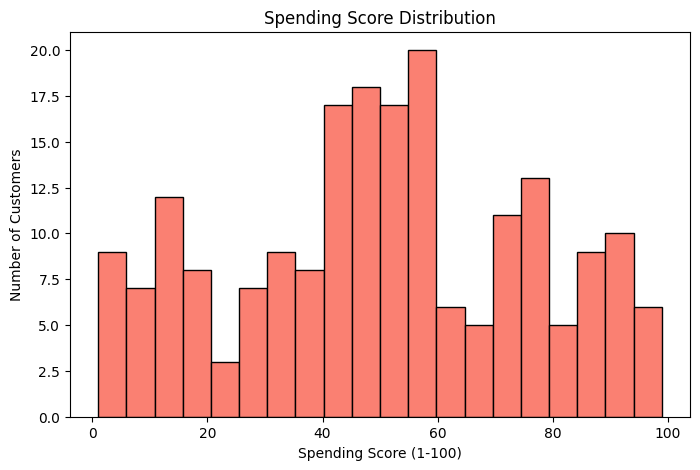

In [6]:
plt.figure(figsize=(8,5))
plt.hist(df['Spending Score (1-100)'], bins=20, color='salmon', edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Customers')
plt.show()


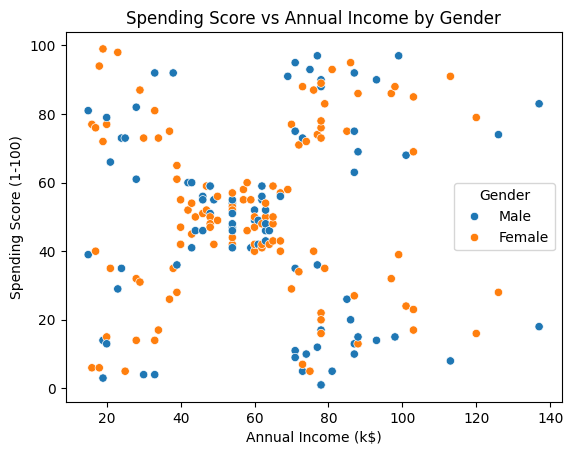

In [7]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Spending Score vs Annual Income by Gender')
plt.show()


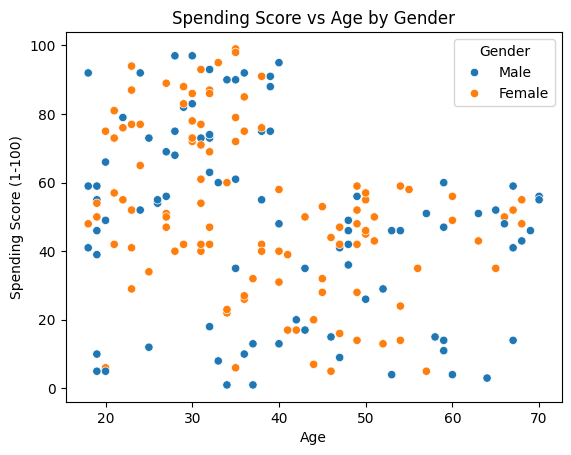

In [8]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Spending Score vs Age by Gender')
plt.show()


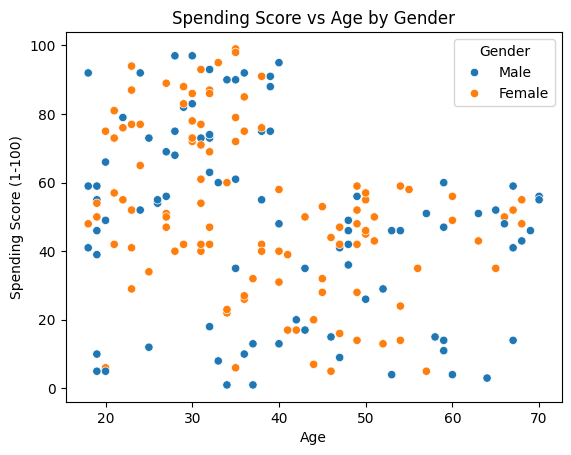

In [9]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Spending Score vs Age by Gender')
plt.show()


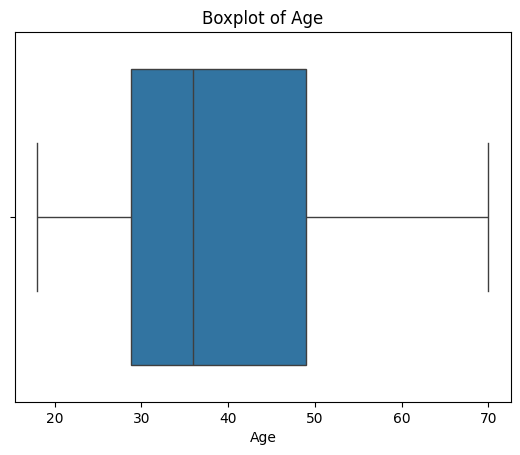

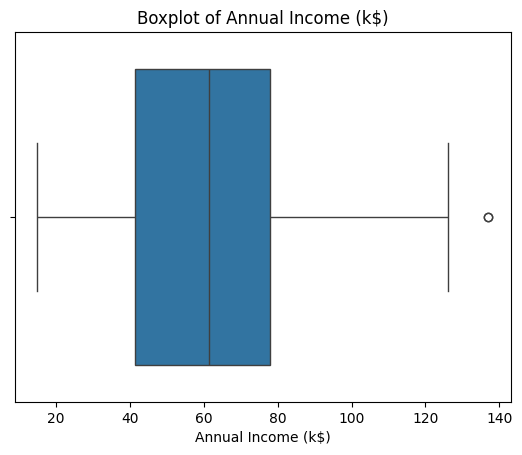

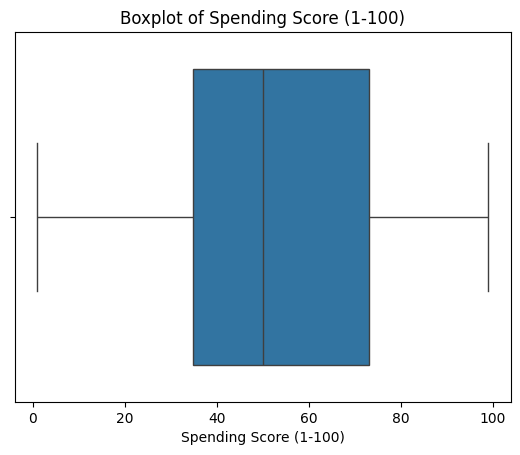

In [11]:
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [12]:
corr = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print("Correlation matrix:")
print(corr)


Correlation matrix:
                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


In [13]:
df['Gender_Numeric'] = df['Gender'].map({'Male': 0, 'Female': 1})
print(df[['Gender', 'Gender_Numeric']].head())


   Gender  Gender_Numeric
0    Male               0
1    Male               0
2  Female               1
3  Female               1
4  Female               1


In [14]:
def assign_age_group(age):
    if age < 28:
        return 'Young'
    elif 28 <= age < 45:
        return 'Middle-aged'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(assign_age_group)
print(df['Age_Group'].value_counts())


Age_Group
Middle-aged    85
Senior         69
Young          46
Name: count, dtype: int64


In [15]:
spending_labels = ['Low', 'Medium', 'High']
df['Spending_Category'] = pd.qcut(df['Spending Score (1-100)'], q=3, labels=spending_labels)
print(df['Spending_Category'].value_counts())


Spending_Category
Medium    68
Low       67
High      65
Name: count, dtype: int64


In [16]:
df['Income_Spending_Ratio'] = df['Annual Income (k$)'] / (df['Spending Score (1-100)'] + 1)
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Income_Spending_Ratio']].head())


   Annual Income (k$)  Spending Score (1-100)  Income_Spending_Ratio
0                  15                      39               0.375000
1                  15                      81               0.182927
2                  16                       6               2.285714
3                  16                      77               0.205128
4                  17                      40               0.414634


In [17]:
df = pd.get_dummies(df, columns=['Age_Group', 'Spending_Category'])
print(df.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Gender_Numeric', 'Income_Spending_Ratio',
       'Age_Group_Middle-aged', 'Age_Group_Senior', 'Age_Group_Young',
       'Spending_Category_Low', 'Spending_Category_Medium',
       'Spending_Category_High'],
      dtype='object')


In [18]:
features_to_use = [
    'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Numeric',
    'Income_Spending_Ratio', 'Age_Group_Middle-aged', 'Age_Group_Senior',
    'Age_Group_Young', 'Spending_Category_Low', 'Spending_Category_Medium',
    'Spending_Category_High'
]
print("Features selected for clustering:")
print(features_to_use)


Features selected for clustering:
['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Numeric', 'Income_Spending_Ratio', 'Age_Group_Middle-aged', 'Age_Group_Senior', 'Age_Group_Young', 'Spending_Category_Low', 'Spending_Category_Medium', 'Spending_Category_High']


In [19]:
scaler = StandardScaler()
X = df[features_to_use]
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features_to_use)
print("Scaled features preview:")
print(X_scaled.head())


Scaled features preview:
        Age  Annual Income (k$)  Spending Score (1-100)  Gender_Numeric  \
0 -1.424569           -1.738999               -0.434801       -1.128152   
1 -1.281035           -1.738999                1.195704       -1.128152   
2 -1.352802           -1.700830               -1.715913        0.886405   
3 -1.137502           -1.700830                1.040418        0.886405   
4 -0.563369           -1.662660               -0.395980        0.886405   

   Income_Spending_Ratio  Age_Group_Middle-aged  Age_Group_Senior  \
0              -0.440747              -0.859727         -0.725753   
1              -0.485000              -0.859727         -0.725753   
2              -0.000530              -0.859727         -0.725753   
3              -0.479885              -0.859727         -0.725753   
4              -0.431616               1.163160         -0.725753   

   Age_Group_Young  Spending_Category_Low  Spending_Category_Medium  \
0         1.829707               1.408

In [20]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

print("Cluster labels assigned (first 10 rows):")
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head(10))

score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score for k={k}: {score:.3f}")


Cluster labels assigned (first 10 rows):
   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        2
1   21                  15                      81        2
2   20                  16                       6        2
3   23                  16                      77        2
4   31                  17                      40        1
5   22                  17                      76        2
6   35                  18                       6        1
7   23                  18                      94        2
8   64                  19                       3        4
9   30                  19                      72        3
Silhouette Score for k=5: 0.389


Silhouette Score for k=2: 0.270
Silhouette Score for k=3: 0.334
Silhouette Score for k=4: 0.373
Silhouette Score for k=5: 0.389
Silhouette Score for k=6: 0.393
Silhouette Score for k=7: 0.426
Silhouette Score for k=8: 0.419
Silhouette Score for k=9: 0.439
Silhouette Score for k=10: 0.436


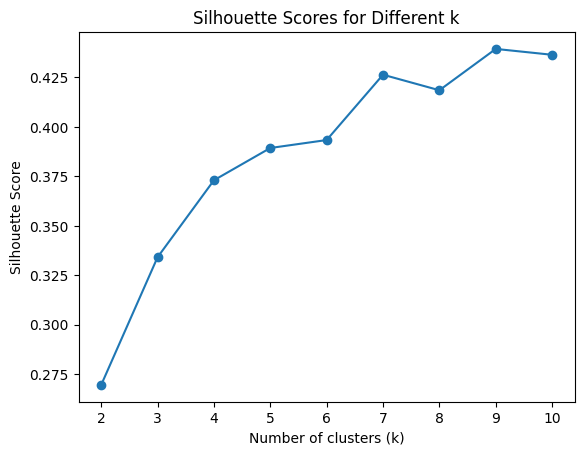

In [21]:
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'Silhouette Score for k={k}: {score:.3f}')

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()


In [22]:
k = 9
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head(10))

score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score for k={k}: {score:.3f}")

numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income_Spending_Ratio', 'Gender_Numeric']
cluster_summary = df.groupby('Cluster')[numeric_features].mean().round(2)
print("\nCluster Profiles:")
print(cluster_summary)


   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        5
1   21                  15                      81        4
2   20                  16                       6        5
3   23                  16                      77        4
4   31                  17                      40        1
5   22                  17                      76        4
6   35                  18                       6        1
7   23                  18                      94        4
8   64                  19                       3        8
9   30                  19                      72        7
Silhouette Score for k=9: 0.439

Cluster Profiles:
           Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                      
0        56.42               54.50                   50.15   
1        37.76               66.68                   24.92   
2        33.33               76.33       

GMM Silhouette Score for k=2: 0.270


/Users/zeeshanabbasi/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering Silhouette Score for k=2: -0.036
---
GMM Silhouette Score for k=3: 0.334


/Users/zeeshanabbasi/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering Silhouette Score for k=3: 0.141
---
GMM Silhouette Score for k=4: 0.370


/Users/zeeshanabbasi/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering Silhouette Score for k=4: 0.185
---
GMM Silhouette Score for k=5: 0.386


/Users/zeeshanabbasi/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering Silhouette Score for k=5: 0.178
---
GMM Silhouette Score for k=6: 0.400


/Users/zeeshanabbasi/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering Silhouette Score for k=6: 0.198
---
GMM Silhouette Score for k=7: 0.426


/Users/zeeshanabbasi/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering Silhouette Score for k=7: 0.337
---
GMM Silhouette Score for k=8: 0.419


/Users/zeeshanabbasi/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering Silhouette Score for k=8: 0.271
---
GMM Silhouette Score for k=9: 0.439
Spectral Clustering Silhouette Score for k=9: 0.420
---


/Users/zeeshanabbasi/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


GMM Silhouette Score for k=10: 0.436
Spectral Clustering Silhouette Score for k=10: 0.416
---


/Users/zeeshanabbasi/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


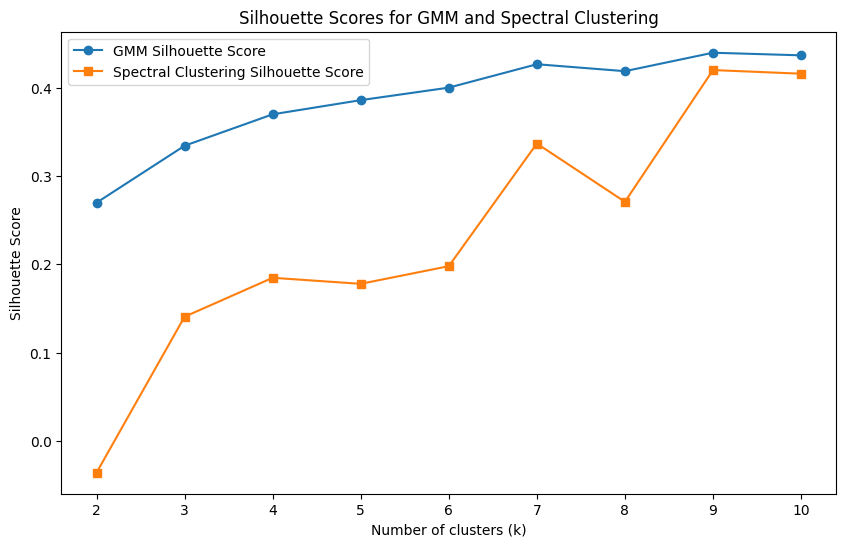

In [23]:
k_values = range(2, 11)
gmm_scores = []
spectral_scores = []

for k in k_values:
    # GMM clustering
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(X_scaled)
    score_gmm = silhouette_score(X_scaled, gmm_labels)
    gmm_scores.append(score_gmm)
    print(f'GMM Silhouette Score for k={k}: {score_gmm:.3f}')
    
    # Spectral clustering
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
    spectral_labels = spectral.fit_predict(X_scaled)
    score_spectral = silhouette_score(X_scaled, spectral_labels)
    spectral_scores.append(score_spectral)
    print(f'Spectral Clustering Silhouette Score for k={k}: {score_spectral:.3f}')
    print('---')

plt.figure(figsize=(10,6))
plt.plot(k_values, gmm_scores, marker='o', label='GMM Silhouette Score')
plt.plot(k_values, spectral_scores, marker='s', label='Spectral Clustering Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for GMM and Spectral Clustering')
plt.legend()
plt.show()
